# Assignment 4.10 Part 1 Coding Etiquette

### This script contains the following:
##### 1. Import libraries and data
##### 2. Security Implications and PII Management
##### 3a. Regional customer behaviour: Data segmentation
##### 3b. Regional customer behaviour: USA regional spending
##### 4. Low activity customer exclusion
##### 5-7. Customer profiling variable creation
##### 8-9. Comparison of customer profiles to regions and departments
##### 10. Export final dataframe

### 1. Import libraries and data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Turing project folder into string
path = r'C:\Users\Jamie&Ken\Desktop\Data Analytics Course\Python Fundeamentals for Data Analysts\08-2024 Instacart Basket Analysis'
# Import dataframe
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ord_prods_cust_merge.pkl'))

In [3]:
# Checking dataframe
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,weekday_of_order,order_hour_of_day,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Frequent customer,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308


In [4]:
# Checking dataframe shape
df.shape

(32404859, 34)

### 2. Security Implications and PII management

##### Sensitive PII: names, email addresses, phone numbers, physical addresses. Any columns that could potentially be traced back to a person should be excluded.

In [5]:
# Print column names to find if dataframe contains PII
df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'weekday_of_order',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'add_to_cart_order', 'reordered', '_merge', 'price_range_loc',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spender', 'average_spend', 'spender_flag',
       'customer_frequency', 'frequency_flag', 'first_name', 'last_name',
       'gender', 'state', 'age', 'date_joined', 'number_of_dependants',
       'marital_status', 'income'],
      dtype='object')

##### Columns containing PII: first_name, last_name, user_id (if linkable to a real person). When combined with other data these columns could link to a person and therefore are considered quasi-PII: state, age, gender, date_joined, number_of_dependants, marital_status, income. The order_id column could also be considered PII depending on what data it is combined with if it has the potential to link back to a real person.

##### As the customer data for this exercise was fabriacted and not linkable to real people, only the first_name, last_name, and date_joined will be dropped from this project. In real practice, the companies policies on PII would be referenced, a senior colleague would be consulted with, and the stakeholders would be asked how to proceed. 

In [6]:
# Dropping PII columns and accidental dupliacte column average_spender
df_clean = df.drop(columns = ['first_name', 'last_name', 'date_joined', 'average_spender'])

In [7]:
# Confirm columns dropped
df_clean.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'weekday_of_order',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'add_to_cart_order', 'reordered', '_merge', 'price_range_loc',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spend', 'spender_flag', 'customer_frequency', 'frequency_flag',
       'gender', 'state', 'age', 'number_of_dependants', 'marital_status',
       'income'],
      dtype='object')

In [8]:
df_clean.shape

(32404859, 30)

### 3a. Regional customer behaviour: Data segmentation

##### As defined in https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States, USA regions are:
##### Region 1: Northeast
##### Region 2: Midwest
##### Region 3: South
##### Region 4: West

In [9]:
# Create region lists
Northeast=['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
Midwest=['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
South=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky', 'Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
West=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [10]:
# Create regional flag column
df_clean.loc[df_clean['state'].isin(Northeast),'region']='Northeast'
df_clean.loc[df_clean['state'].isin(Midwest),'region']='Midwest'
df_clean.loc[df_clean['state'].isin(South),'region']='South'
df_clean.loc[df_clean['state'].isin(West),'region']='West'

In [11]:
# Check for flag column
df_clean.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,weekday_of_order,order_hour_of_day,...,spender_flag,customer_frequency,frequency_flag,gender,state,age,number_of_dependants,marital_status,income,region
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,1,married,49620,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,1,married,49620,Midwest
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Low spender,8.0,Frequent customer,Female,Vermont,66,2,married,158302,Northeast
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Low spender,9.0,Frequent customer,Female,Wisconsin,40,3,married,31308,Midwest
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Low spender,9.0,Frequent customer,Female,Wisconsin,40,3,married,31308,Midwest


In [12]:
# Check flag applied to all rows
len(df_clean['region'])

32404859

In [13]:
# Check frequency
df_clean['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

### 3b. Regional customer behaviour: USA regional spending

In [14]:
# Create crosstab
crosstab = pd.crosstab(df_clean['region'], df_clean['spender_flag'], dropna = False)

In [15]:
# Check crosstab
crosstab

spender_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


##### The South has the highest amount of high spenders but also the highest amount of low spenders. This could be due to population size. 

In [16]:
# Calculate proportion of spenders in Midwest

midwest_spender = np.array([155975, 7441350])

midwest_proportions = midwest_spender / np.sum(midwest_spender)

print(f"Midwest proportion of high spenders: {midwest_proportions[0]:.4%}")
print(f"Midwest proportion of low spenders: {midwest_proportions[1]:.4%}")

northeast_spender = np.array([108225, 5614511])

northeast_proportions = northeast_spender / np.sum(northeast_spender)

print(f"Northeast proportion of high spenders: {northeast_proportions[0]:.4%}")
print(f"Northeast proportion of low spenders: {northeast_proportions[1]:.4%}")

south_spender = np.array([209691, 10582194])

south_proportions = south_spender / np.sum(south_spender)

print(f"South proportion of high spenders: {south_proportions[0]:.4%}")
print(f"South proportion of low spenders: {south_proportions[1]:.4%}")

west_spender = np.array([106354, 8132559])

west_proportions = west_spender / np.sum(west_spender)

print(f"West proportion of high spenders: {west_proportions[0]:.4%}")
print(f"West proportion of low spenders: {west_proportions[1]:.4%}")

Midwest proportion of high spenders: 2.0530%
Midwest proportion of low spenders: 97.9470%
Northeast proportion of high spenders: 1.8911%
Northeast proportion of low spenders: 98.1089%
South proportion of high spenders: 1.9430%
South proportion of low spenders: 98.0570%
West proportion of high spenders: 1.2909%
West proportion of low spenders: 98.7091%


##### After performing some calculations to determine the proportion of spender types to the total amount of customers a region has based on the spender flag, we can learn that the Midwest actually has the largest amount of big spenders and smallest amount of low spenders. 

### 4. Low activity customer exclusion

In [17]:
# Create an exclusion flag for customers with < 5 orders 
df_clean.loc[df_clean['max_order']<5, 'activity'] = 'low'
df_clean.loc[df_clean['max_order']>=5, 'activity'] = 'average_to_high'

In [18]:
# Create a dataframe of customers with orders less than 5
df_low = df_clean[df_clean['activity'] == 'low']

In [19]:
# Check dataframe
df_low.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,weekday_of_order,order_hour_of_day,...,customer_frequency,frequency_flag,gender,state,age,number_of_dependants,marital_status,income,region,activity
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,9.0,Frequent customer,Female,Wisconsin,40,3,married,31308,Midwest,low
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,9.0,Frequent customer,Female,Wisconsin,40,3,married,31308,Midwest,low
34,1,Chocolate Sandwich Cookies,61,19,5.8,2434812,1598,1,2,12,...,2.0,Frequent customer,Male,Kansas,41,2,married,122060,Midwest,low
35,1,Chocolate Sandwich Cookies,61,19,5.8,1531889,1598,2,2,10,...,2.0,Frequent customer,Male,Kansas,41,2,married,122060,Midwest,low
36,1,Chocolate Sandwich Cookies,61,19,5.8,726947,1598,3,4,17,...,2.0,Frequent customer,Male,Kansas,41,2,married,122060,Midwest,low


In [20]:
# Create a dataframe without customers having less than 5 orders
df_reg = df_clean[df_clean['activity'] == 'average_to_high']

In [21]:
# Check reg dataframe
df_reg.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,weekday_of_order,order_hour_of_day,...,customer_frequency,frequency_flag,gender,state,age,number_of_dependants,marital_status,income,region,activity
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,8.0,Frequent customer,Male,Minnesota,81,1,married,49620,Midwest,average_to_high
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,8.0,Frequent customer,Male,Minnesota,81,1,married,49620,Midwest,average_to_high
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,8.0,Frequent customer,Female,Vermont,66,2,married,158302,Northeast,average_to_high
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,11.0,Regular customer,Female,Hawaii,51,2,married,57797,West,average_to_high
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,20.0,Regular customer,Male,District of Columbia,20,3,living with parents and siblings,34171,South,average_to_high


In [22]:
# Compare counts of new dataframes to original
df_low['activity'].value_counts(dropna = False)

activity
low    1440295
Name: count, dtype: int64

In [23]:
df_reg['activity'].value_counts(dropna = False)

activity
average_to_high    30964564
Name: count, dtype: int64

In [24]:
df_clean['activity'].value_counts(dropna = False)

activity
average_to_high    30964564
low                 1440295
Name: count, dtype: int64

In [25]:
# Export new dataframes (I have chosen pickle formats due to memory issues and dataframe size. I understand Excel is preferable if the dataframes are smaller and stakeholders have python knowledge.)
df_low.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_customers.pkl'))
df_reg.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'reg_and_high_activity_customers.pkl'))

### 5-7. Customer profiling variable creation

#### Age Profile

###### I have chosen to continue using the dataframe cleaned of PII for the following sections as the exercise did not state if other departments were not interested in low activity customers. 

In [26]:
# Create an age profiling variable
df_clean.loc[df_clean['age'] <=25, 'age_group'] = 'Young adult'
df_clean.loc[(df_clean['age']<65) & (df_clean['age'] >25), 'age_group']= 'Adult'
df_clean.loc[df_clean['age'] >= 65, 'age_group'] = 'Senior'

In [27]:
# Check new variable
df_clean['age_group'].value_counts(dropna = False)

age_group
Adult          19784586
Senior          8575084
Young adult     4045189
Name: count, dtype: int64

In [28]:
# Check flag applied to all rows
len(df_clean['age_group'])

32404859

In [29]:
df_clean.head(5)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,weekday_of_order,order_hour_of_day,...,frequency_flag,gender,state,age,number_of_dependants,marital_status,income,region,activity,age_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Male,Minnesota,81,1,married,49620,Midwest,average_to_high,Senior
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Male,Minnesota,81,1,married,49620,Midwest,average_to_high,Senior
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Frequent customer,Female,Vermont,66,2,married,158302,Northeast,average_to_high,Senior
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Frequent customer,Female,Wisconsin,40,3,married,31308,Midwest,low,Adult
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Frequent customer,Female,Wisconsin,40,3,married,31308,Midwest,low,Adult


In [30]:
# Aggregate on 'customer_frequency' for usage frequency
df_clean.groupby('age_group').agg({'customer_frequency' : ['mean', 'min', 'max']})

customer_frequency           
                          mean  min   max
age_group                                
Adult                10.416147  0.0  30.0
Senior               10.362496  0.0  30.0
Young adult          10.382574  0.0  30.0

In [31]:
# Aggregate on 'average_spend' for age group expenditure
df_clean.groupby('age_group').agg({'average_spend' : ['mean', 'min', 'max']})

average_spend                   
                     mean  min           max
age_group                                   
Adult           12.031993  1.0  25005.425000
Senior          11.768850  1.0  14042.512281
Young adult     12.175118  1.1  10209.987755

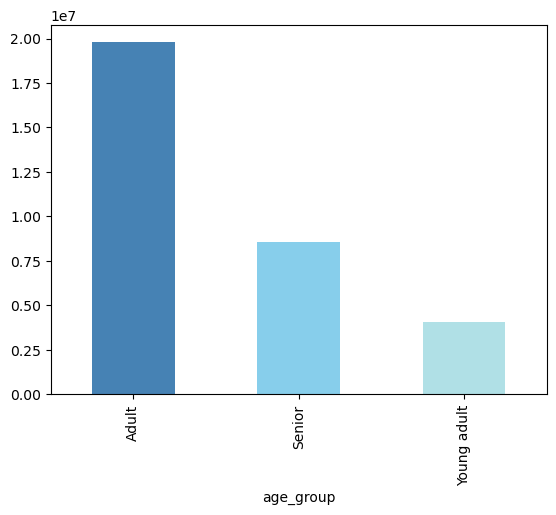

In [32]:
# Age visualization
age_bar = df_clean['age_group'].value_counts().plot.bar(color = ['steelblue', 'skyblue', 'powderblue'])

In [33]:
# Export bar chart
age_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_group.png'))

#### Income Profile

In [34]:
# Create income profiling variable 
df_clean.loc[df_clean['income'] <= 60000, 'income_group'] = 'Low income'
df_clean.loc[(df_clean['income']<150000) & (df_clean['income'] >60000), 'income_group']= 'Middle income'
df_clean.loc[df_clean['income'] >= 150000, 'income_group'] = 'High income'

In [35]:
# Check new variable
df_clean['income_group'].value_counts()

income_group
Middle income    22192586
Low income        6160692
High income       4051581
Name: count, dtype: int64

In [36]:
# Check flag applied to all rows
len(df_clean['income_group'])

32404859

In [37]:
df_clean.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,weekday_of_order,order_hour_of_day,...,gender,state,age,number_of_dependants,marital_status,income,region,activity,age_group,income_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Male,Minnesota,81,1,married,49620,Midwest,average_to_high,Senior,Low income
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Male,Minnesota,81,1,married,49620,Midwest,average_to_high,Senior,Low income
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Female,Vermont,66,2,married,158302,Northeast,average_to_high,Senior,High income
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Female,Wisconsin,40,3,married,31308,Midwest,low,Adult,Low income
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Female,Wisconsin,40,3,married,31308,Midwest,low,Adult,Low income


In [38]:
# Aggregate on 'customer_frequency' for usage frequency
df_clean.groupby('income_group').agg({'customer_frequency' : ['mean', 'min', 'max']})

customer_frequency           
                            mean  min   max
income_group                               
High income            10.175572  0.0  30.0
Low income             10.885268  0.0  30.0
Middle income          10.302989  0.0  30.0

In [39]:
# Aggregate on 'average_spend' for age group expenditure
df_clean.groupby('income_group').agg({'average_spend' : ['mean', 'min', 'max']})

average_spend                   
                       mean  min           max
income_group                                  
High income       32.889850  7.0  25005.425000
Low income         7.079585  1.0     21.272202
Middle income      9.523292  7.0  14042.512281

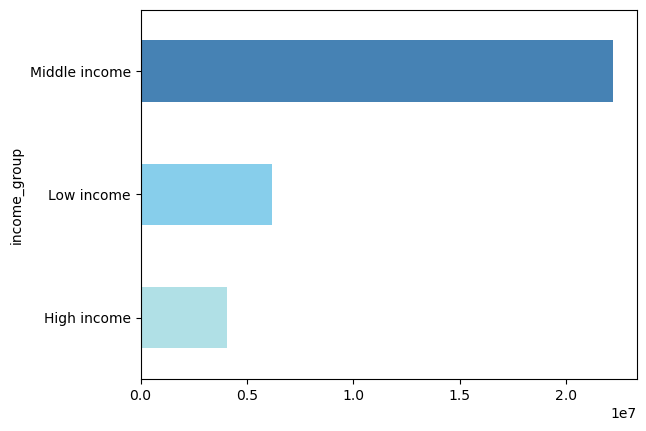

In [40]:
# Income profile visualization
income_bar = df_clean['income_group'].value_counts().sort_values().plot.barh(color = ['powderblue', 'skyblue', 'steelblue'])

In [41]:
# Export bar chart
income_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_group.png'))

#### Dependant Group

In [42]:
# Create dependant group profiling variable
df_clean.loc[df_clean['number_of_dependants'] == 0, 'dependant_group'] = 'No dependents'
df_clean.loc[(df_clean['number_of_dependants']<=2) & (df_clean['number_of_dependants'] >0), 'dependant_group']= '1-2 dependants'
df_clean.loc[df_clean['number_of_dependants'] >= 3, 'dependant_group'] = '3+ dependants'

In [43]:
# Check variable
df_clean['dependant_group'].value_counts(dropna = False)

dependant_group
1-2 dependants    16172247
3+ dependants      8135109
No dependents      8097503
Name: count, dtype: int64

In [44]:
# Check flag applied to all rows
len(df_clean['dependant_group'])

32404859

In [45]:
df_clean.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,weekday_of_order,order_hour_of_day,...,state,age,number_of_dependants,marital_status,income,region,activity,age_group,income_group,dependant_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Minnesota,81,1,married,49620,Midwest,average_to_high,Senior,Low income,1-2 dependants
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Minnesota,81,1,married,49620,Midwest,average_to_high,Senior,Low income,1-2 dependants
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Vermont,66,2,married,158302,Northeast,average_to_high,Senior,High income,1-2 dependants
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Wisconsin,40,3,married,31308,Midwest,low,Adult,Low income,3+ dependants
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Wisconsin,40,3,married,31308,Midwest,low,Adult,Low income,3+ dependants


In [46]:
# Aggregate on 'customer_frequency' for usage frequency
df_clean.groupby('dependant_group').agg({'customer_frequency' : ['mean', 'min', 'max']})

customer_frequency           
                              mean  min   max
dependant_group                              
1-2 dependants           10.416266  0.0  30.0
3+ dependants            10.391021  0.0  30.0
No dependents            10.367567  0.0  30.0

In [47]:
# Aggregate on 'average_spend' for age group expenditure
df_clean.groupby('dependant_group').agg({'average_spend' : ['mean', 'min', 'max']})

average_spend                   
                         mean  min           max
dependant_group                                 
1-2 dependants      11.999659  1.0  12506.925000
3+ dependants       11.793264  1.0  10209.987755
No dependents       12.129243  1.0  25005.425000

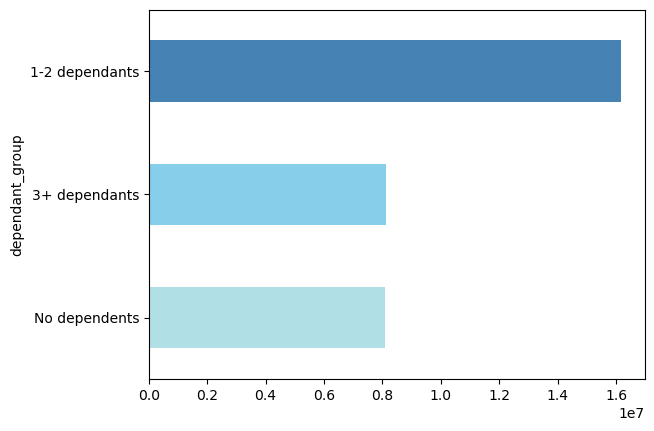

In [48]:
# Depenant_group profile visualization
# Income profile visualization
dependant_bar = df_clean['dependant_group'].value_counts().sort_values().plot.barh(color = ['powderblue', 'skyblue', 'steelblue'])

In [49]:
# Export bar chart
dependant_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dependant_group.png'))

### Department ID profiles

##### Connect dataframes

In [50]:
# Import departments dataframe
df_dept=pd.read_csv(os.path.join(path,'02 Data','Prepared Data','v.1.departments_wrangled.csv'))

In [51]:
# Check dataframe
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [52]:
# Rename unnamed column to department_id
df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [53]:
# Check if column renamed
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [54]:
# Turn dataframe into data dictionary
zipped = zip(df_dept['department_id'], df_dept['department'])
data_dict = dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [55]:
# Connected df_dept to df_clean on department_id
df_clean['department'] = df['department_id'].map(data_dict)

In [56]:
# Check dataframe
df_clean.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,weekday_of_order,order_hour_of_day,...,age,number_of_dependants,marital_status,income,region,activity,age_group,income_group,dependant_group,department
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,81,1,married,49620,Midwest,average_to_high,Senior,Low income,1-2 dependants,snacks
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,81,1,married,49620,Midwest,average_to_high,Senior,Low income,1-2 dependants,snacks
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,66,2,married,158302,Northeast,average_to_high,Senior,High income,1-2 dependants,snacks
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,40,3,married,31308,Midwest,low,Adult,Low income,3+ dependants,snacks
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,40,3,married,31308,Midwest,low,Adult,Low income,3+ dependants,snacks


#### Department - Pets Profile

In [57]:
# Create pet profiling variable (who buys products vs who doesnt)
df_clean['pet_status'] = [1 if x == 'pets' else 0 for x in df_clean['department']]
df_clean['pet_status'] = df_clean.groupby(['user_id'])['pet_status'].transform("max")

In [58]:
# Check dataframe
df_clean.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,weekday_of_order,order_hour_of_day,...,number_of_dependants,marital_status,income,region,activity,age_group,income_group,dependant_group,department,pet_status
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,1,married,49620,Midwest,average_to_high,Senior,Low income,1-2 dependants,snacks,0
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,1,married,49620,Midwest,average_to_high,Senior,Low income,1-2 dependants,snacks,0
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,2,married,158302,Northeast,average_to_high,Senior,High income,1-2 dependants,snacks,1
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,3,married,31308,Midwest,low,Adult,Low income,3+ dependants,snacks,0
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,3,married,31308,Midwest,low,Adult,Low income,3+ dependants,snacks,0


In [59]:
# Check variable
df_clean['pet_status'].value_counts(dropna=False)

pet_status
0    28876718
1     3528141
Name: count, dtype: int64

In [60]:
# Aggregate for order frequency for pet related items
df_clean.groupby('pet_status').agg({'customer_frequency' : ['mean', 'min', 'max']})

customer_frequency           
                         mean  min   max
pet_status                              
0                   10.517953  0.0  30.0
1                    9.414006  0.0  30.0

In [61]:
# Aggregate for pet related items expenditure
df_clean.groupby('pet_status').agg({'average_spend' : ['mean', 'min', 'max']})

average_spend                        
                    mean       min           max
pet_status                                      
0              11.680857  1.000000  25005.425000
1              14.430461  2.755556   6390.138298

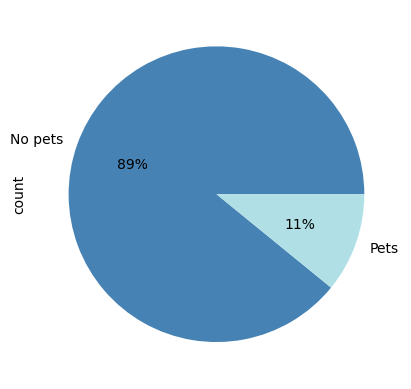

In [62]:
# Pet status visualization
pet_pie = df_clean['pet_status'].value_counts().plot.pie(labels=['No pets', 'Pets'], autopct=('%1.f%%'), colors=['steelblue','powderblue'])

In [63]:
# Export pet_status pie chart
pet_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_pie.png'))

#### Department - Baby Profile

In [64]:
# Create baby department profiling variable
df_clean['baby_status'] = [1 if x == 'babies' else 0 for x in df_clean['department']]
df_clean['baby_status'] = df_clean.groupby(['user_id'])['baby_status'].transform("max")

In [65]:
# Check new variable
df_clean['baby_status'].value_counts(dropna=False)

baby_status
0    22431550
1     9973309
Name: count, dtype: int64

In [66]:
# Aggregate for baby_status order frequency
df_clean.groupby('baby_status').agg({'customer_frequency' : ['mean', 'min', 'max']})

customer_frequency           
                          mean  min   max
baby_status                              
0                    11.253698  0.0  30.0
1                     8.472618  0.0  30.0

In [67]:
# Aggregate for baby_status expenditure
df_clean.groupby('baby_status').agg({'average_spend' : ['mean', 'min', 'max']})

average_spend                     
                     mean    min           max
baby_status                                   
0               12.515291  1.000  25005.425000
1               10.776779  1.425   4768.028571

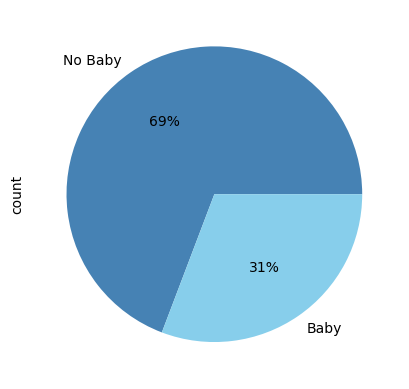

In [68]:
# Baby status visualization
baby_pie = df_clean['baby_status'].value_counts().plot.pie(labels=['No Baby', 'Baby'], autopct=('%1.f%%'), colors=['steelblue','skyblue'])

In [69]:
# Export Pie chart
baby_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'baby_pie.png'))

### 8-9. Comparison of customer profiles to regions and departments

In [70]:
# Create crosstab for region and age groups
age_region = pd.crosstab(df_clean['region'],df_clean['age_group'], dropna = False)

In [71]:
# Check crosstab
age_region

age_group,Adult,Senior,Young adult
region,,,
Midwest,4666947,1990844,939534
Northeast,3457721,1553903,711112
South,6578963,2836257,1376665
West,5080955,2194080,1017878


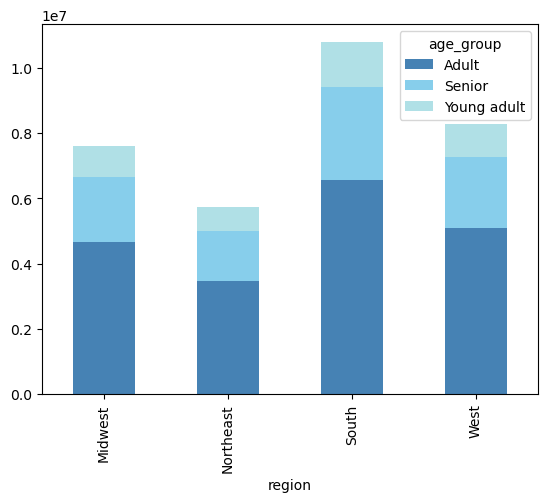

In [72]:
# Age region Bar chart
regional_ages_bar = age_region.plot(kind = 'bar', stacked = True, color = ('steelblue', 'skyblue', 'powderblue'))

In [73]:
# Export bar chart
regional_ages_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regional_ages_bar.png'))

In [74]:
# Create crosstab for region and income
regional_income = pd.crosstab(df_clean['region'], df_clean['income_group'], dropna = False)

In [75]:
# Check crosstab
regional_income

income_group,High income,Low income,Middle income
region,,,
Midwest,955948,1426435,5214942
Northeast,706788,1082018,3933930
South,1342212,2086189,7363484
West,1046633,1566050,5680230


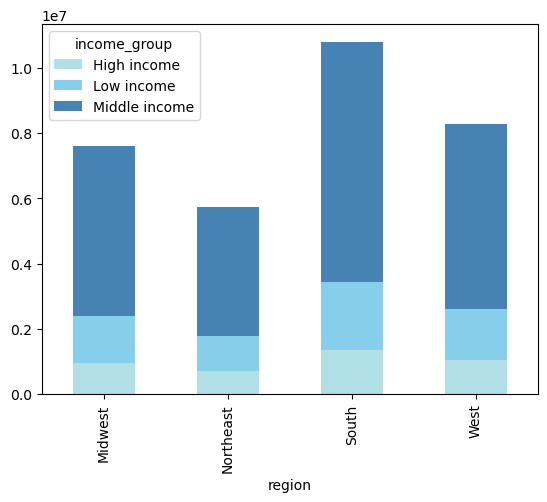

In [76]:
# Create regional income bar chart
regional_income_bar = regional_income.plot(kind = 'bar', stacked = True, color = ('powderblue', 'skyblue', 'steelblue'))

In [77]:
# Export bar chart
regional_income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'regional_income_bar.png'))

In [78]:
# Create crosstab for region and department
regional_dept = pd.crosstab(df_clean['department'], df_clean['region'], dropna = False)

In [79]:
# Check crosstab
regional_dept

region,Midwest,Northeast,South,West
department,,,,
alcohol,36186,26542,51624,39344
babies,98983,75139,143654,106026
bakery,273869,208599,388815,301145
beverages,625574,483418,898940,680191
breakfast,163551,123574,234251,181657
bulk,8193,5802,11533,9045
canned goods,250702,186755,356015,274586
dairy eggs,1264223,954026,1796969,1383529
deli,245678,186817,349419,269335


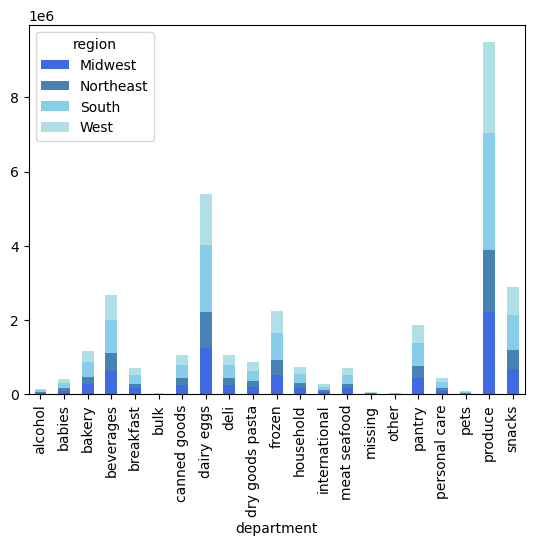

In [80]:
# Create  regional_dept bar
regional_dept_bar = regional_dept.plot(kind= 'bar', stacked = True, color = ('royalblue', 'steelblue', 'skyblue', 'powderblue'))

In [81]:
# Export bar chart
regional_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'regional_dept_bar.png'))

In [82]:
# Create crosstab for region and price range
regional_price_range = pd.crosstab(df_clean['region'], df_clean['price_range_loc'], dropna = False)

In [83]:
# Check crosstab
regional_price_range

price_range_loc,High-range product,Low-range product,Mid-range product
region,,,
Midwest,97918,2372304,5127103
Northeast,73202,1792943,3856591
South,139390,3368338,7284157
West,107168,2592736,5593009


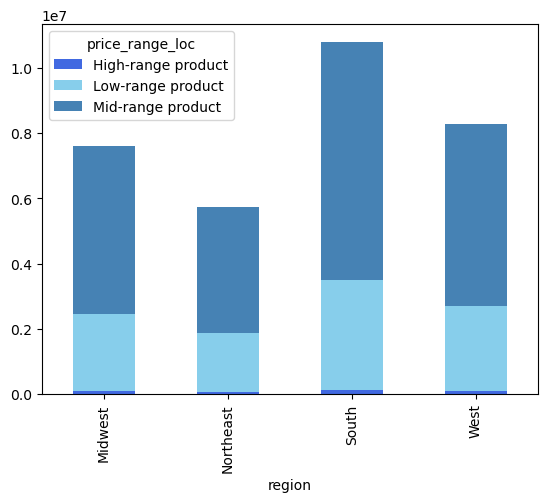

In [84]:
# Create bar chart
regional_price_range_bar = regional_price_range.plot(kind= 'bar', stacked = True, color = ('royalblue', 'skyblue', 'steelblue'))

In [85]:
# Export bar chart
regional_price_range_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regional_pricerange_bar.png'))

In [86]:
# Create crosstab for income and customer frequency
frequency_vs_income = pd.crosstab(df_clean['income_group'], df_clean['frequency_flag'], dropna = True)

In [87]:
# Check crosstab
frequency_vs_income

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
income_group,,,
High income,2738539,424322,888720
Low income,3967368,806487,1386837
Middle income,14853946,2405628,4933007


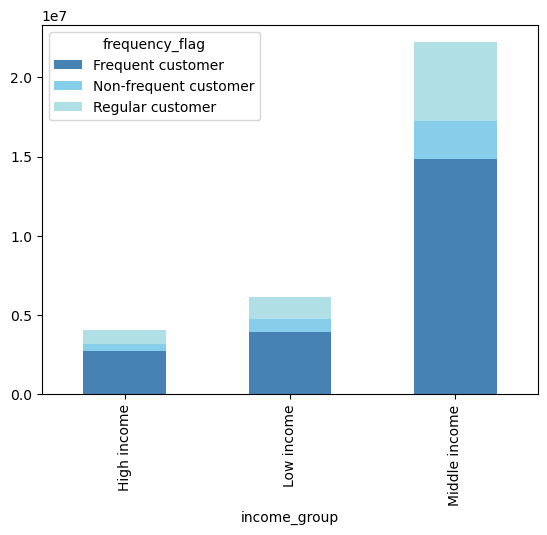

In [88]:
# Create bar chart
frequency_vs_income_bar = frequency_vs_income.plot(kind = 'bar', stacked = True, color = ('steelblue', 'skyblue', 'powderblue'))

In [89]:
# Export bar chart
frequency_vs_income_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'frequency_vs_income_bar.png'))

In [90]:
# Create crosstab for age and frequency
age_freq = pd.crosstab(df_clean['age_group'], df_clean['frequency_flag'], dropna = True)

In [91]:
# Check crosstab
age_freq

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
age_group,,,
Adult,13133299,2232850,4418432
Senior,5728812,951609,1894663
Young adult,2697742,451978,895469


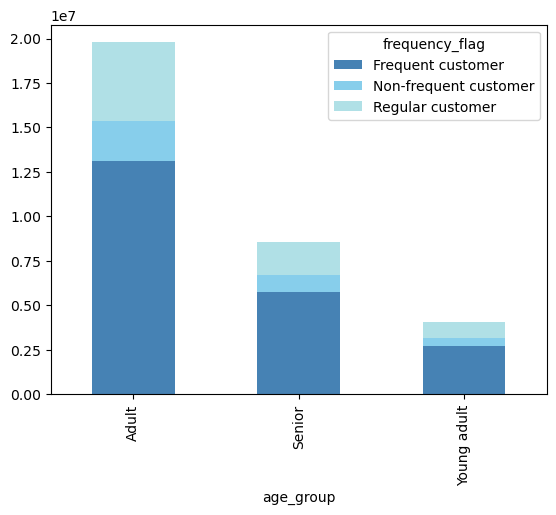

In [92]:
# Create bar chart
age_freq_bar = age_freq.plot(kind = 'bar', stacked = True, color = ('steelblue', 'skyblue', 'powderblue'))

In [93]:
# Save bar chart
age_freq_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_freq_bar.png'))

In [94]:
# Create crosstab for marital status and customer frequency
marital_freq = pd.crosstab(df_clean['marital_status'], df_clean['frequency_flag'], dropna = True)

In [95]:
# Check crosstab
marital_freq

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
marital_status,,,
divorced/widowed,1852101,306903,612808
living with parents and siblings,1047100,175019,328484
married,15137381,2564637,5054730
single,3523271,589878,1212542


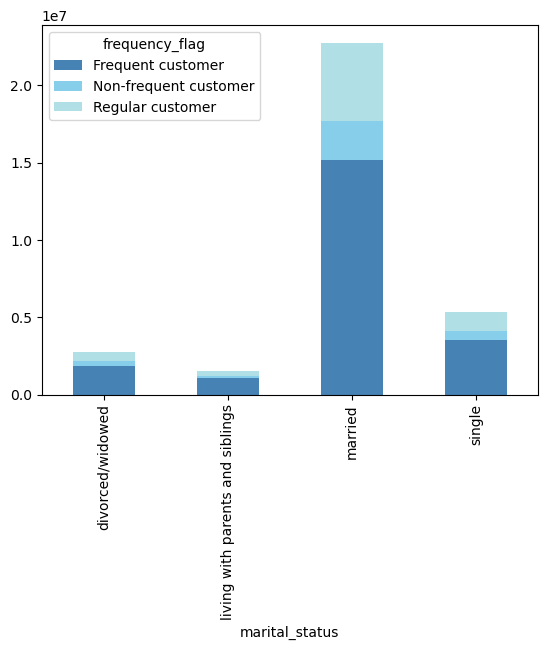

In [96]:
# Create bar chart
marital_freq_bar = marital_freq.plot(kind = 'bar', stacked = True, color = ('steelblue', 'skyblue', 'powderblue'))

In [97]:
# Export bar chart
marital_freq_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'marital_freq_bar.png'))

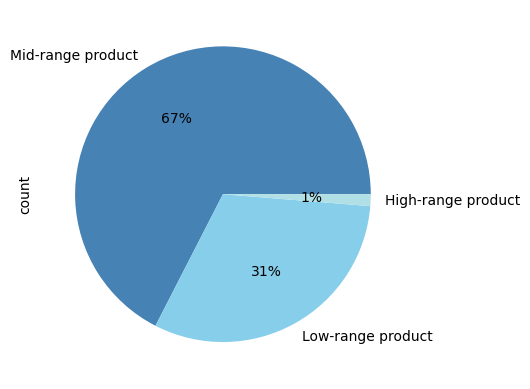

In [98]:
# Find info on amount of products within price range
price_range_pie = df_clean['price_range_loc'].value_counts().plot.pie(autopct=('%1.f%%'), colors = ('steelblue', 'skyblue', 'powderblue'))

In [99]:
# Export pie chart
price_range_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_price_range_loc.png'))

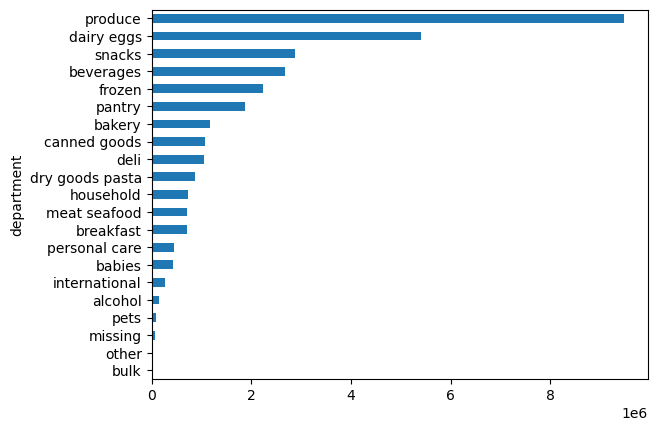

In [100]:
# Find counts for department items
department_counts_bar = df_clean.department.value_counts().sort_values().plot(kind = 'barh')

In [101]:
# Export bar
department_counts_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Bar_department.png'))

In [102]:
# Create department purchases by customer type
dep_freq = pd.crosstab(df_clean['department'], df_clean['frequency_flag'], dropna = True)

In [103]:
# check cross tab
dep_freq

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
department,,,
alcohol,103146,17685,32865
babies,319940,31932,71930
bakery,782925,129647,259856
beverages,1784868,304072,599183
breakfast,463571,80674,158788
bulk,25371,3066,6136
canned goods,671983,137430,258645
dairy eggs,3677609,567109,1154028
deli,685793,122881,242575


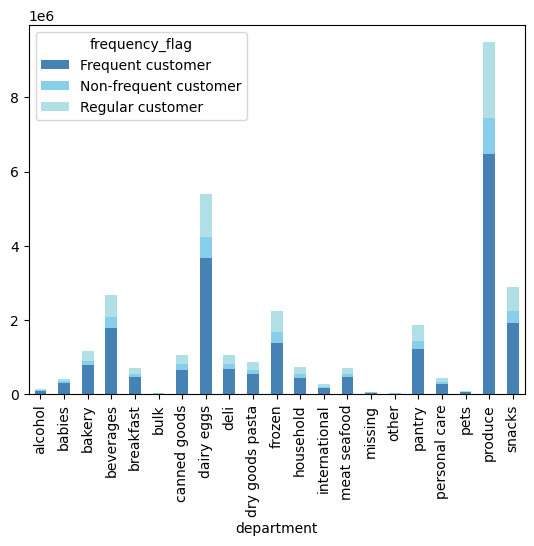

In [104]:
dep_freq_bar = dep_freq.plot(kind='bar', stacked =True, color = ('steelblue', 'skyblue', 'powderblue'))

In [105]:
# Export chart
dep_freq_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dep_frequency.png'))

In [109]:
# Create department purchases by loyalty type
dep_loyal = pd.crosstab(df_clean['department'], df_clean['loyalty_flag'], dropna = True)

In [110]:
# Check crosstab
dep_loyal

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38723,37698,77275
babies,167108,60118,196576
bakery,379873,223704,568851
beverages,855017,512871,1320235
breakfast,221577,138362,343094
bulk,13834,5271,15468
canned goods,294594,236180,537284
dairy eggs,1830707,971621,2596419
deli,324046,205750,521453


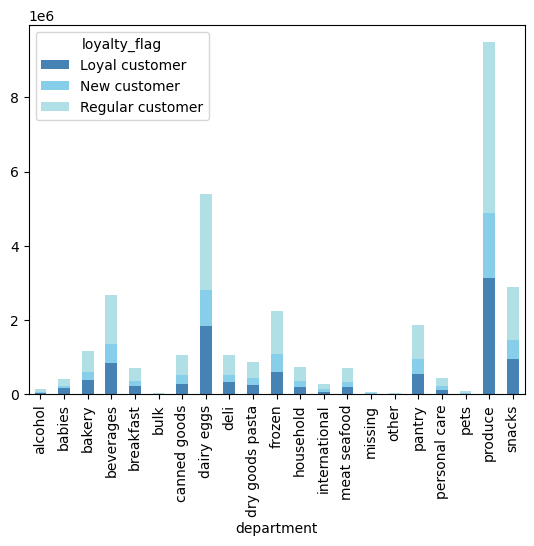

In [111]:
dep_loyal_bar = dep_loyal.plot(kind='bar', stacked =True, color = ('steelblue', 'skyblue', 'powderblue'))

In [112]:
# Export chart
dep_loyal_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dep_loyalty.png'))

### 10. Export final dataframe

In [123]:
# Export dataframe
df_clean.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Orders_products_all.pkl'))